In [2]:
import pandas
import numpy as np
import tomotopy as tp
import re
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

Tiền xử lý dữ liệu

In [3]:
with open('data/vietnamese-stopwords-dash.txt',encoding='utf-8') as f:
    stop_words=f.read().splitlines()

In [ ]:
head = ['title', 'summary', 'date', 'categorys', 'content', 'url']
def preprocess(data_path,name):
    data = pandas.read_csv(data_path)
    docs = {'title':[], 'summary':[], 'date':[], 'categorys':[], 'content':[], 'url':[], 'words':[]}
    for i in range(data.shape[0]):
        title, summary, date, categorys, content, url = data['title'][i], data['summary'][i], data['date'][i], data['categorys'][i], data['content'][i], data['url'][i]
        if not isinstance(content, str):
            continue
        if isinstance(categorys, str):
            categorys = categorys.split(',') if isinstance(categorys, str) else None
            categorys = '</>'.join([' '.join(re.split('\W+', cate)) for cate in categorys])
        title = ' '.join(re.split('\W+', ViTokenizer.tokenize(title).lower())) if isinstance(title, str) else None
        summary = ' '.join(re.split('\W+', ViTokenizer.tokenize(summary).lower())) if isinstance(summary, str) else None
        print(title)
            
        content = re.split('\W+',ViTokenizer.tokenize(content).lower())
        words = ' '.join([segment for segment in content if segment not in stop_words and not segment.isdigit()])
        
        docs['title'].append(title)
        docs['summary'].append(summary)
        docs['date'].append(date)
        docs['categorys'].append(categorys)
        docs['content'].append(' '.join(content))
        docs['url'].append(url)
        docs['words'].append(words)

    df = pandas.DataFrame(docs)
    df.to_csv('data/%s.csv'%name, index=False)

preprocess('data/zing_news3.csv','zing_news_processed')

In [ ]:
preprocess('data/dantri.csv','dantri_processed')

Tìm hiểu dữ liệu

In [4]:
zing = pandas.read_csv('data/zing_news3.csv')
print(zing.shape)

(50662, 6)


In [20]:
print(len([title for title in zing['title'] if not isinstance(title, str)]))
print(len([summary for summary in zing['summary'] if not isinstance(summary, str)]))
print(len([content for content in zing['content'] if not isinstance(content, str)]))
ctr=0
for content in zing['content']:
    if isinstance(content, str):
        if len(content.split()) <= 10:
            ctr += 1
            print(content)
print(ctr)

0
0
9021
 
 
Xem thêm:
 
            
  
   
   
 
               
   
 
 
 
 
 
 
 Trung Kiên Theo Infonet
Theo Ngoisao.vn
         
           
 
                                                                                                                                               
 
 Sắp xếp: Họ tên  Năm sinh  
 Sắp xếp: Họ tên  Năm sinh  
   
 
   
   
      
Lê Hiếu Theo Infonet
 
 
Ty Theo Bưu điện Việt Nam 
Ty Theo Bưu điện Việt Nam 
Theo VnExpress
        
   
 
  
 
 
               
 
 
 
     
  
                                   
 
 
 
 
 
 
 
Top 20 cây cầy đẹp nhất thế giới bao gồm:
  
1. Nguyên nhân làm giảm chiều cao
 
 
 
    
 
    
 
 
 
 
 
 
   
 
         
 
 
 
 
 
 
 
                   
Theo VTC
Quang Hưng Theo Infonet
         
 
 
   
        
 
   
      
 
 
 
 
       
Hồng Duy Theo Infonet
           
 
 
Vũ Vũ Theo Therichest/ Infonet
   
   
Thực hiện: Ngọc Hiền.
   
 
      
Minh Đức Theo Infonet
  
 
 
Thành Luân Theo Infonet
 
 
  
          

In [9]:
dantri = pandas.read_csv('data/dantri.csv')
print(dantri.shape)

(39482, 6)


In [21]:
print(len([title for title in dantri['title'] if not isinstance(title, str)]))
print(len([summary for summary in dantri['summary'] if not isinstance(summary, str)]))
print(len([content for content in dantri['content'] if not isinstance(content, str)]))
ctr = 0
for content in dantri['content']:
    if isinstance(content, str):
        if len(content.split()) <= 10:
            ctr += 1
            print(content)
print(ctr)

208
208
2315
Thế Anh
Thảo Lê Theo Archdaily
Bích NgọcTheo Business Insider
Dung Nhi Theo TW
Hồng Minh
Đỗ Quân
Đỗ Quân
Quốc Triều 
Quân Đỗ
Xuân Sinh - Phượng Vũ - Tiến Hiệp
Trần Thanh - Quang Phong
Thành Đạt Ảnh: Reuters, Đồ họa: Guardian
Thành Đạt
Đức Hoàng Ảnh: Reuters, AFP, Rex
Đức Hoàng Ảnh: Reuters
 Đức Hoàng Ảnh: Reuters, AFP
Thành Đạt Ảnh: Reuters
Đức Hoàng Ảnh: Reuters, AFP, AP, Getty
Dung Nhi Theo TS
Đỗ Linh
Thu Hương
Tiến Tuấn - Đỗ Linh
Sau đây là toàn văn bức thư:
Theo VTV.VN
Tiến Hiệp
  Biên dịch: Cẩm Tú Đồ hoạ: Ngọc Diệp 
Thảo Lê Theo The Sun, Yahoo News
Trường Thịnh
Thảo Lê Theo Archdaily
Trường Thịnh
Việt Vũ Ảnh: Hữu Thắng
Thảo Trinh Ảnh: Quang Trần
Thảo Lê Theo Love property
Thảo Lê Theo Mansion Global
Thảo Lê Theo Insider
Đỗ Quân
Infographics: Ngọc Diệp
Bảng giá Maserati cập nhật tháng 6/2020: Như Phúc
Thế Anh
Thế Anh
Bài và ảnh: Gia An
Nguyễn Nguyễn Nguồn video: Youtube
Nguyễn Nguyễn
 Nguyễn Nguyễn Theo AA
Thế Anh
Tiến Thành
Bích NgọcTheo Insider
Bích NgọcTheo Insider


Trung Kiên 
                            Mạnh Thắng
Trần Thanh
Ngọc Hưng
Đại Dương
Đại Dương
Đại Dương
Đại Dương
 
Trung Thi
Toàn Vũ
Nguyễn Trường
                    Minh Phương
                    Đức Hoàng Theo SCMP
Theo Hồng Phú Dân Việt
Tiến Hiệp
Thảo Vy Theo BS
  Toàn Vũ
  Hà Trang - Toàn Vũ
                Đức Hoàng Theo The Drive
          Toàn Vũ
Như Phúc Nguồn: UB An toàn Giao thông QG  
Thảo Lê Theo Dezeen
Thanh Nhàn Theo CNBC
  Hà Trang - Toàn Vũ
Minh Phương Theo LATimes
Theo Nghi Dung Dân Việt
Trọng Trinh
Nguyễn Hùng Video:  Fox News
    Phương Nhung
Ảnh: NVCC
  Phương Nhung
Theo (Vietnam+) http://www.vietnamplus.vn/infographics-cac-cuoc-tranh-luan-an-tuong-trong-lich-su-nuoc-my/407734.vnp
                        Phương Nhung
Ảnh: Nguyễn Thành
                      Phương Nhung
Ảnh: An Trần - Lê Huy
Theo Vietnam Plus
                    Xuân Ngọc
Hoàng Dung
Theo Hồng Phú Dân Việt
Theo Hồng Phú Dân Việt
Thái Bá
  Thế Hưng
Trường Thịnh
Mai Khôi - Trường Thịnh
                

Đỗ Quân – Hoài Sơn – Khánh Hồng
Đại Dương
Đỗ Quân


 Theo TTXVN/baotintuc.vn
                      Đức Hoàng Tổng hợp
                        Thành Đạt Ảnh: Reuters
Đức Hoàng Ảnh: LandVest Martha's Vineyard
                                        An Bình
        Minh Phương
                                An Bình Ảnh: AFP, Reuters
Băng Châu (Tổng hợp)
Hữu Nghị
Hồng Minh
                                  Minh Phương Ảnh: Reuters  
                    Vĩnh Ngọc Theo DM
                    An Bình Tổng hợp
                                            Vĩnh Ngọc Theo Pin
                      An Bình
                                An Bình  
Phương Nhung
Ảnh: Hải Bá
Hà Tùng Long
                                                    Phương Nhung
Ảnh: Huy Bình
Đức Hoàng Ảnh: Reuters, AFP
                              An Bình  
  Châu Như Quỳnh (tổng hợp)      
                      Thành Đạt Ảnh: Reuters  
                      Thành Đạt Ảnh: Reuters, Korea Times
                      Thành Đạt 

In [12]:
data = dantri
print(data.shape)
print(len(data['title'].unique()))
print(len(data['content'].unique()))
print(len(data['categorys'].unique()))
print(len(data['summary'].unique()))
print(len(data['date'].unique()))
print(len(data['url'].unique()))

(39482, 6)
38361
35845
181
38214
36495
39482


In [23]:
data =  pandas.read_csv('data/zing_news_processed.csv')
print(data.head(4))

                                               title  \
0          quốc_hội_đồng_ý giải_cứu vietnam_airlines   
1  vietnam_airlines dự_kiến năm sau mỗi ngày lỗ v...   
2  cục hàng_không yêu_cầu rà_soát việc đưa_đón kh...   
3  tài_xế xe công_nghệ ở sân_bay tân_sơn nhất lo ...   

                                             summary  \
0  quốc_hội nhất_trí với đề_nghị của chính_phủ về...   
1  lo_ngại thị_trường quốc_tế chưa thể phục_hồi c...   
2  lãnh_đạo cục hàng_không chỉ_đạo cảng_vụ hàng_k...   
3  sau quy_định phân làn ôtô mới tại sân_bay tân_...   

                               date                    categorys  \
0  Thứ ba, 17/11/2020 16:37 (GMT+7)                      Xã hội    
1  Thứ sáu, 6/11/2020 16:09 (GMT+7)   Kinh doanh </> Hàng không    
2  Thứ ba, 17/11/2020 14:53 (GMT+7)                      Xã hội    
3  Thứ ba, 17/11/2020 05:00 (GMT+7)                  Kinh doanh    

                                             content  \
0  chiều 17 11 trước khi bế_mạc quốc_hội 

In [4]:
print(data.shape)
print(len(data['title'].unique()))
print(len(data['content'].unique()))
print(len(data['categorys'].unique()))
print(len(data['date'].unique()))

(41641, 7)
41325
41349
130
38395


In [17]:
data = dantri
for i, cate in enumerate(data['date']):
    data['date'][i] = ' '.join(cate.split()[:-2])

x=data.groupby('date').content.count()
print(x.shape)
print(x)
# print(dict(x))
x = dict(x)
y = sorted(x, key=lambda z:x[z], reverse=True)
print(x[y[0]], y[0])

AttributeError: 'float' object has no attribute 'split'

In [16]:
z = list(x.values())
print(sum(z)/len(z))

15.10373594486761


In [18]:
categorys = set([cate.split('</>')[0] for cate in data['categorys']])
print(len(categorys))
print(categorys)

31
{' Kinh doanh ', ' Du lịch ', ' SEA Games 30 ', ' Âm nhạc ', ' World Cup 2014 Unused ', ' Pháp luật ', ' ', ' Xe ', ' Thế giới ', ' Doanh nghiệp tự giới thiệu ', ' Nhịp sống ', ' Euro 2016 ', ' Sức khỏe ', ' Xuất bản ', ' Thời trang ', ' Bầu cử Mỹ 2020 ', ' SEA Games 28 Unused ', ' Công nghệ ', ' Giải trí ', ' Ẩm thực ', ' Bầu cử Tổng thống Mỹ 2016 ', ' Bóng đá Anh ', ' Xã hội ', ' World Cup 2018 ', ' Đại hội Đảng XIII ', ' Đời sống ', ' Phim ảnh ', ' Giáo dục ', ' SEA Games 29 ', ' Thể thao ', ' Khám phá '}


<AxesSubplot:>

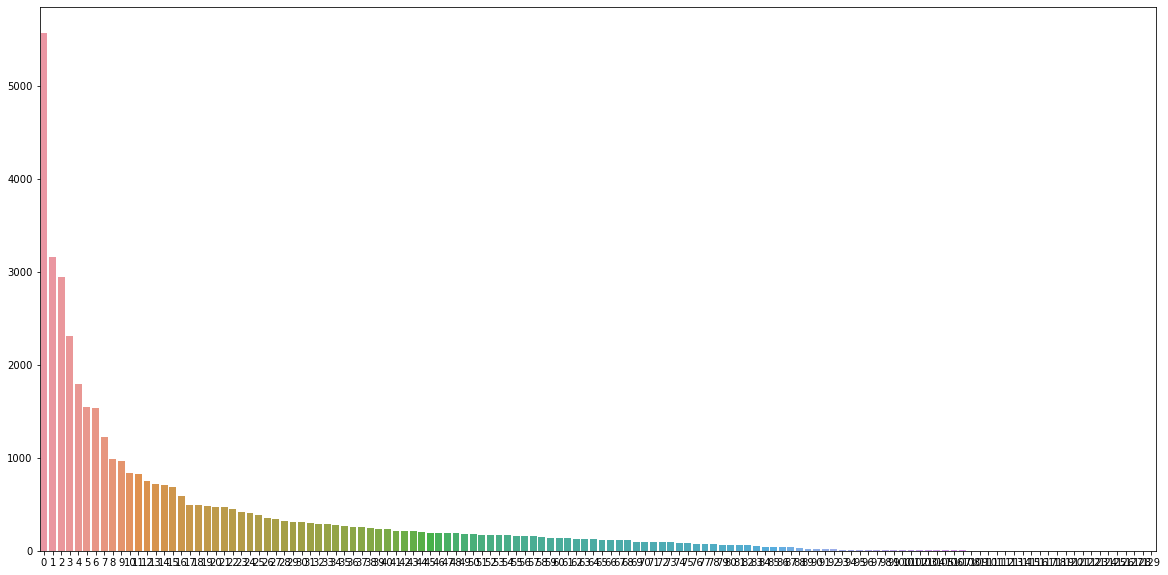

In [6]:
plt.figure(figsize=(20, 10))
sns.barplot(y=sorted(data.groupby('categorys').content.count(), reverse=True), x=list(range(130)))